In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1,1)
y = 0.5 * X**2 + X + 2 + np.random.normal( size = (100,1))

score: 0.4953707811865009


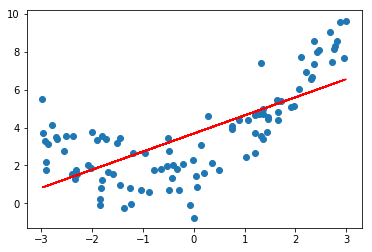

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print("score:", lin_reg.score(X,y))
y_predict = lin_reg.predict(X)

plt.scatter(X, y)
plt.plot(X, y_predict, color = 'r')#注意这里的X不是按顺序的，可是画上去依旧像是一个直线，是因为直线上的各个点来回画来画去。
plt.show()

### MSE:均方误差

In [5]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

### Polynomial Regression

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
    ("my_poly", PolynomialFeatures(degree) ), #tuple1： （"自己命名"， 类名）
    ("my_std_scaler", StandardScaler() ),
    ("my_lin_reg", LinearRegression() )
    ])

In [18]:
poly2_reg = PolynomialRegression(degree = 2)
poly2_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('my_poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('my_std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('my_lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [19]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

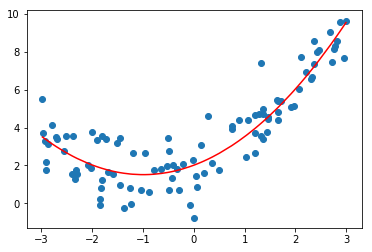

In [20]:
plt.scatter(x,y)
plt.plot(np.sort(x), y2_predict[(np.argsort(x))], color = 'r')
plt.show()

In [21]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X,y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764164

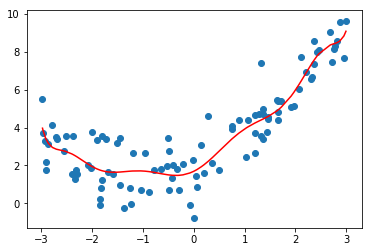

In [22]:
plt.scatter(x,y)
plt.plot(np.sort(x), y10_predict[(np.argsort(x))], color = 'r')
plt.show()

In [23]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.687293250556113

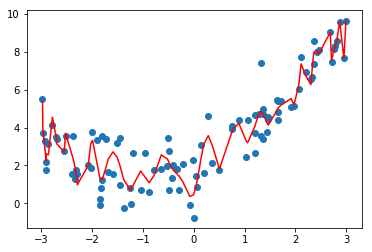

In [24]:
plt.scatter(x,y)
plt.plot(np.sort(x), y100_predict[(np.argsort(x))], color = 'r')
plt.show()

In [30]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly100_reg.predict(X_plot)

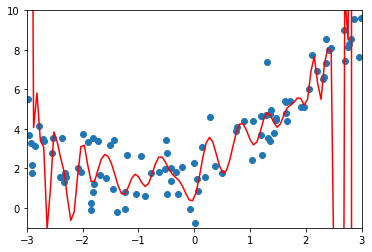

In [31]:
plt.scatter(x,y)
plt.axis([-3,3,-1,10]) 
plt.plot(X_plot[:,0], y_plot, color = 'r')
plt.show()

#### Overfitting: 我认为是过度将 噪音 看做有效信息了。

### 切分测试数据的意义：用于测试泛化能力

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 666)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [35]:
poly2_reg = PolynomialRegression(2)
poly2_reg.fit(X_train, y_train)
y_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

0.8035641056297901

In [36]:
poly10_reg = PolynomialRegression(10)
poly10_reg.fit(X_train, y_train)
y_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y_predict) #测试数据集上，error比degree=2的高

0.9212930722150781

In [37]:
poly100_reg = PolynomialRegression(100)
poly100_reg.fit(X_train, y_train)
y_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y_predict) #error非常大

14440175276.314638